In [1]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt

### BG which Stud begins to worn out

In [2]:
tt = 1.8 # mm
BR = 20
Dc = 16 # mm
BG = ((tt) * math.tan(math.radians(BR)) * 8) / Dc
print(BG)

0.32757321083958213


# Cutter Volumn Equation
> > > > > > > > > 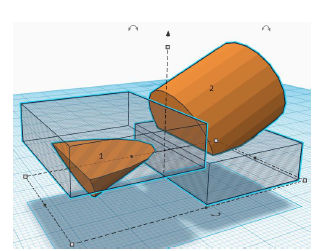

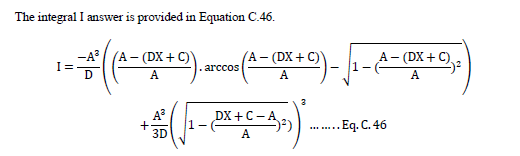
> ### Replacing the boundries:
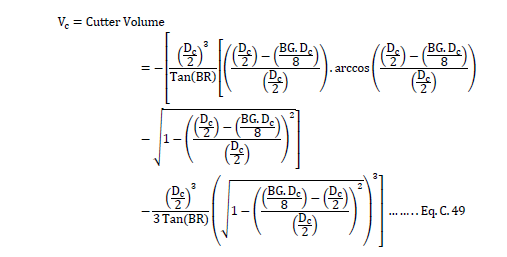

In [3]:
a = Dc/2
b = BG*Dc/8 
A = (a-b) / a
B = (a**3) / math.tan(math.radians(BR))
C = B / 3

Vc = -(B*(A*math.acos(A)-(1-A**2)**0.5)+C*((1-A**2)**0.5)**3)
print(Vc)

2.0183161353407364


In [4]:
#print(B*(A*math.acos(A)-(1-A**2)**0.5))
#print(C*((1-A**2)**0.5)**3)
#print(-(B*(A*math.acos(A)-(1-A**2)**0.5)+C*((1-A**2)**0.5)**3))

In [5]:
def Vc(Dc, BR, BG):
    a = Dc/2
    b = BG*Dc/8
    A = (a-b) / a
    B = (a**3) / math.tan(math.radians(BR))
    C = B / 3
    Vc = -(B*(A*math.acos(A)-(1-A**2)**0.5)+C*((1-A**2)**0.5)**3)
    return Vc   

In [6]:
Vc(16, 20, 0.327)

2.009529727041201

In [7]:
def PDC_Carbide(Dc, BR, BG, tt):
    
    V_total = Vc(Dc, BR, BG)
    x = BG*Dc/8
    x_ther = tt / math.tan(math.radians(90-BR))
    BG_ther = 8*x_ther / Dc
    
    if x > x_ther:
        
        L = x*math.tan(math.radians(90-BR))
        L_c = L - tt
        x_c = x* L_c/L
        BG_c = x_c*8/Dc
        V_c = Vc(Dc, BR, BG_c)
        V_PDC = (V_total - V_c)
    else:
        
        L = x*math.tan(math.radians(90-BR))
        L_c = 0
        x_c = 0
        BG_c = 0
        V_c = 0
        V_PDC = Vc(Dc, BR, BG)
        
    return x, x_ther, L, L_c, x_c, BG, BG_ther, BG_c, V_c, V_total, V_PDC, V_c
    

In [8]:
x, x_ther, L, L_c, x_c, BG, BG_ther, BG_c, V_c, V_total, V_PDC, V_c = PDC_Carbide(16, 20, 0.06, 1.77)

In [9]:
#PDC_Carbide(Dc, BR, BG, tt)
PDC_Carbide(16, 20, 0.06, 1.77)[10] #PDC

0.0291908473243776

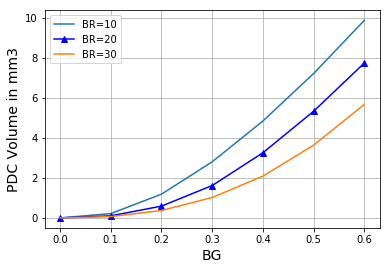

In [10]:
BG_list = list(range(0,7))
BG_list = [BG / 10 for BG in BG_list]

V_PDC_BR10 = [PDC_Carbide(16, 10, BG, 1.77)[10] for BG in BG_list]
V_PDC_BR20 = [PDC_Carbide(16, 20, BG, 1.77)[10] for BG in BG_list]
V_PDC_BR30 = [PDC_Carbide(16, 30, BG, 1.77)[10] for BG in BG_list]

#%matplotlib inline
plt.plot(BG_list, V_PDC_BR10, label='BR=10')
plt.plot(BG_list, V_PDC_BR20, label='BR=20', marker='^', c='b')
#plt.axvline(x=BG, c='r', linestyle='--')
plt.plot(BG_list, V_PDC_BR30, label='BR=30')
plt.xlabel('BG', fontsize=14)
plt.ylabel('PDC Volume in mm3', fontsize=14)
plt.grid(True)
plt.legend()

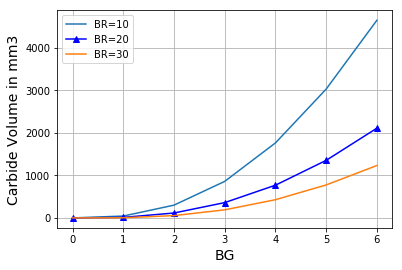

In [11]:
BG_list = list(range(0,7))
BG_list = [BG / 1 for BG in BG_list]

V_carb_BR10 = [PDC_Carbide(16, 10, BG, 1.77)[11] for BG in BG_list]
V_carb_BR20 = [PDC_Carbide(16, 20, BG, 1.77)[11] for BG in BG_list]
V_carb_BR30 = [PDC_Carbide(16, 30, BG, 1.77)[11] for BG in BG_list]
#fig = plt.figure(figsize=(14,10))
#%matplotlib inline
plt.plot(BG_list, V_carb_BR10, label='BR=10')
plt.plot(BG_list, V_carb_BR20, label='BR=20', marker='^', c='b')
#plt.axvline(x=BG, c='r', linestyle='--')
plt.plot(BG_list, V_carb_BR30, label='BR=30')
plt.xlabel('BG', fontsize=14)
plt.ylabel('Carbide Volume in mm3', fontsize=14)
plt.grid(True)
plt.legend()

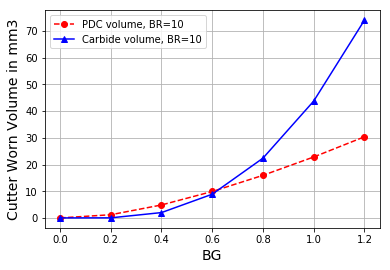

In [12]:
BG_list = list(range(0,7))
BG_list = [BG / 5 for BG in BG_list]

V_PDC_BR10 = [PDC_Carbide(16, 10, BG, 1.77)[10] for BG in BG_list]
V_carb_BR10 = [PDC_Carbide(16, 10, BG, 1.77)[11] for BG in BG_list]
#fig = plt.figure(figsize=(14,10))
#%matplotlib inline
plt.plot(BG_list, V_PDC_BR10, label='PDC volume, BR=10', marker='o', linestyle = '--', c='r')
plt.plot(BG_list, V_carb_BR10, label='Carbide volume, BR=10', marker='^', c='b')
#plt.axvline(x=BG, c='r', linestyle='--')
plt.xlabel('BG', fontsize=14)
plt.ylabel('Cutter Worn Volume in mm3', fontsize=14)
plt.grid(True)
plt.legend()

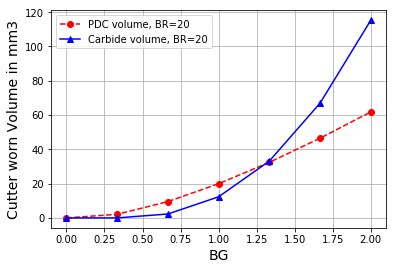

In [13]:
BG_list = list(range(0,7))
BG_list = [BG / 3 for BG in BG_list]

V_PDC_BR20 = [PDC_Carbide(16, 20, BG, 1.77)[10] for BG in BG_list]
V_carb_BR20 = [PDC_Carbide(16, 20, BG, 1.77)[11] for BG in BG_list]
#fig = plt.figure(figsize=(14,10))
#%matplotlib inline
plt.plot(BG_list, V_PDC_BR20, label='PDC volume, BR=20', marker='o', linestyle = '--', c='r')
plt.plot(BG_list, V_carb_BR20, label='Carbide volume, BR=20', marker='^', c='b')
#plt.axvline(x=BG, c='r', linestyle='--')
plt.xlabel('BG', fontsize=14)
plt.ylabel('Cutter worn Volume in mm3', fontsize=14)
plt.grid(True)
plt.legend()

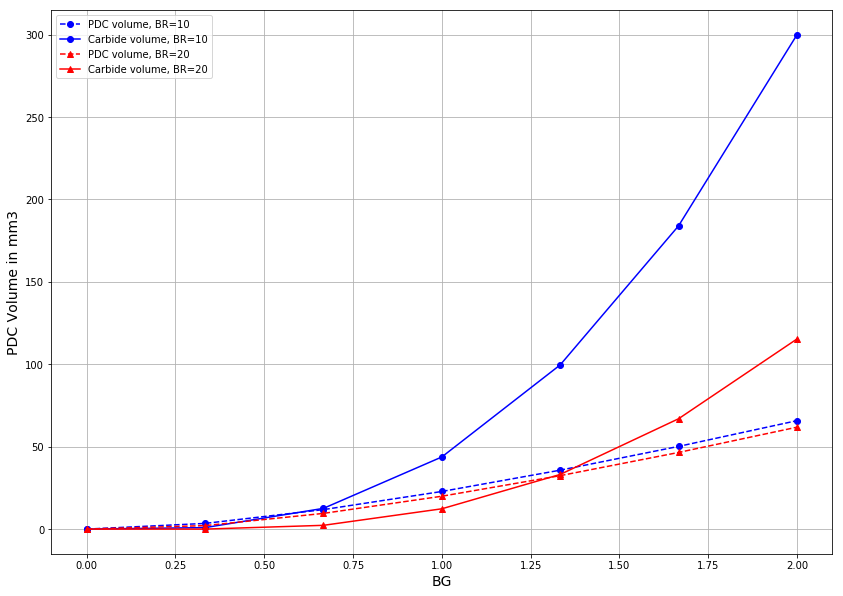

In [14]:
BG_list = list(range(0,7))
BG_list = [BG / 3 for BG in BG_list]

V_PDC_BR10 = [PDC_Carbide(16, 10, BG, 1.77)[10] for BG in BG_list]
V_carb_BR10 = [PDC_Carbide(16, 10, BG, 1.77)[11] for BG in BG_list]
V_PDC_BR20 = [PDC_Carbide(16, 20, BG, 1.77)[10] for BG in BG_list]
V_carb_BR20 = [PDC_Carbide(16, 20, BG, 1.77)[11] for BG in BG_list]


fig = plt.figure(figsize=(14,10))
#%matplotlib inline
plt.plot(BG_list, V_PDC_BR10, label='PDC volume, BR=10', linestyle = '--', c='b', marker='o')
plt.plot(BG_list, V_carb_BR10, label='Carbide volume, BR=10', marker='o', c='b')
plt.plot(BG_list, V_PDC_BR20, label='PDC volume, BR=20', c='r', linestyle = '--', marker='^')
plt.plot(BG_list, V_carb_BR20, label='Carbide volume, BR=20', marker='^', c='r')
#plt.axvline(x=BG, c='r', linestyle='--')
plt.xlabel('BG', fontsize=14)
plt.ylabel('PDC Volume in mm3', fontsize=14)
plt.grid(True)
plt.legend()

In [15]:
print('L = ', L)
print('x = ', x)
print('x_ther = ', x_ther)
print('BG = ', BG)
print('BG_ther = ', BG_ther)
print(30*'=')
print('L_c = ', L_c)
print('x_c = ', x_c)
print('BG_c = ', BG_c)
print(30*'=')
print('V_total = ', V_total)
print('V_PDC= ', V_PDC)
print('V_c = ', V_c)
print(30*'=')
print('PDC volume % {}'.format(((V_total - V_c)/V_total)*100))
print('Carbide volume % {}'.format(((V_c)/V_total)*100))

L =  0.3296972903345546
x =  0.12
x_ther =  0.6442273146511783
BG =  0.06
BG_ther =  0.32211365732558916
L_c =  0
x_c =  0
BG_c =  0
V_total =  0.0291908473243776
V_PDC=  0.0291908473243776
V_c =  0
PDC volume % 100.0
Carbide volume % 0.0


### Plot Cutter volumn versus BG for different BR

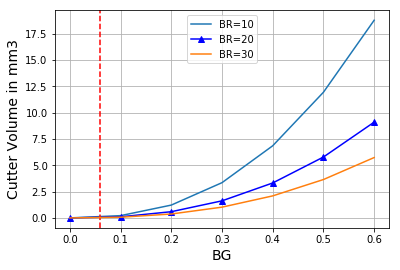

In [16]:
BG_list = list(range(0,7))
BG_list = [BG / 10 for BG in BG_list]

Vc_list_BR10 = [Vc(16,10,BG) for BG in BG_list]
Vc_list_BR20 = [Vc(16,20,BG) for BG in BG_list]
Vc_list_BR30 = [Vc(16,30,BG) for BG in BG_list]

#%matplotlib inline
plt.plot(BG_list, Vc_list_BR10, label='BR=10')
plt.plot(BG_list, Vc_list_BR20, label='BR=20', marker='^', c='b')
plt.axvline(x=BG, c='r', linestyle='--')
plt.plot(BG_list, Vc_list_BR30, label='BR=30')
plt.xlabel('BG', fontsize=14)
plt.ylabel('Cutter Volume in mm3', fontsize=14)
plt.grid(True)
plt.legend()

PDC worn off volume

In [17]:
Vc(16, 20, 0.33)

2.0557688597779986

45 degree example

In [18]:
Vc(16, 45, 8)

1608.4954386379745

Comparison calculations for 45-degree example

In [19]:
BG = 8
Dc = 16
BR = 45
BG*Dc/8
cylinder_Vol = (math.pi*Dc**2/4)*Dc
print(cylinder_Vol)
print(cylinder_Vol/2)
Vc(Dc, BR, BG)

3216.990877275948
1608.495438637974


1608.4954386379745

### Plot cutter volume incrementally

In [20]:
BG = 0.33

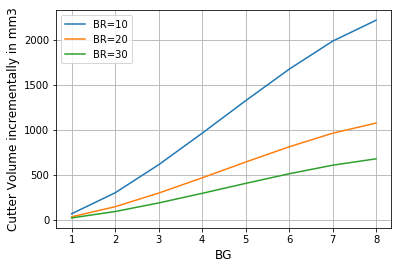

In [21]:
BG_list_BR10 = list(range(1,9))
BG_list_BR10 = [BG / 1 for BG in BG_list_BR10]
Vc_list_BR10_incr = [(Vc(16,10,(BG))-Vc(16,10,(BG-1))) for BG in BG_list_BR10]

BG_list_BR20 = list(range(1,9))
BG_list_BR20 = [BG / 1 for BG in BG_list_BR20]
Vc_list_BR20_incr = [(Vc(16,20,(BG))-Vc(16,20,(BG-1))) for BG in BG_list_BR20]

BG_list_BR30 = list(range(1,9))
BG_list_BR30 = [BG / 1 for BG in BG_list_BR30]
Vc_list_BR30_incr = [(Vc(16,30,(BG))-Vc(16,30,(BG-1))) for BG in BG_list_BR30]

plt.plot(BG_list_BR10, Vc_list_BR10_incr, label='BR=10')
plt.plot(BG_list_BR20, Vc_list_BR20_incr, label='BR=20')
plt.plot(BG_list_BR30, Vc_list_BR30_incr, label='BR=30')
#plt.axvline(x=BG, c='r', linestyle='--')
plt.xlabel('BG', fontsize=12)
plt.ylabel('Cutter Volume incrementally in mm3', fontsize=12)
plt.grid(True)
plt.legend()

Some comparisons 

In [22]:
Rc = Dc / 2
Area = math.pi*Rc**2
PDC_Vol = Area * tt
PDC_Vol

361.91147369354417

In [23]:
BG = 0.33
Dc = 16
PDC_Vol_wornoff = Vc(16,20,BG)
PDC_Vol_wornoff

2.0557688597779986

In [24]:
PDC_Vol_wornoff / PDC_Vol

0.005680308609167672

In [25]:
def A_circle(X):
    A_circle = Rc**2*math.acos((Rc-X)/Rc)-(Rc-X)*(2*Rc*X-X**2)**0.5
    return A_circle

In [26]:
Dc = 16
tt = 1.8
BG = 0.33
print(A_circle(BG*Dc/8))
A_circle(BG*Dc/8)*tt

2.8240082622651457


5.083214872077263

In [27]:
A_circle(16)

201.06192982974676

In [28]:
A_circle(BG*Dc/8)/A_circle(16)

0.014045464820995359